# Authors of the code are Sudeep Ghosh and Siddhant Rathi :)


In [1]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
import numpy as np
import math

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
op = Operator(np.random.rand(2, 2))
op.input_dims()

(2,)

Operator(op x input)
Qubits = input/2

In [5]:
def QCL_QPE(operator, depth):                             
    ancilla = QuantumRegister(1, name='ancilla')      
    inp = QuantumRegister(operator.input_dims()[0]/2, name='input')
    measurement = ClassicalRegister(depth, name='storage')

    qc = QuantumCircuit(ancilla, inp, measurement)
    
    controlled_operator = operator.control(1)
    
    for qubitNo in range(0, depth):       
        qc.h(ancilla[0])                        
        power = depth - qubitNo
        for j in range(0, pow(2, power)):
            qc.append(operator, [ancilla[0], inp[0]])
        

        i = 0
        while i < qubitNo:                    
            qc.ry(np.pi, ancilla[0])           
            i = i+1                 
        qc.h(ancilla[0])                    
        qc.measure(ancilla[0], measurement[qubitNo]) 
        qc.reset(ancilla[0])                         
    return qc

operator = Operator([[0, 1], [1, 0]])
qc = QCL_QPE(operator, 6)

AttributeError: 'Operator' object has no attribute 'control'

In [59]:
# Pseudo-code

    # repeat nc times
        # H on first ancilla
        # Z on first input controlled by first ancilla
        # for Jth time, repeat (J-1) times 
              # Ry(pi) on first ancilla
        # H on first ancilla  
        # measure first ancilla, store results in memory
        # reset first ancilla
        
# Summary
    
    # Hence, we are measuring H [[Ry(pi)]^(j-1)] H |0⟩ for j ∈ [1, nc]
    # Plus, CZ on first input by state |+⟩ nc times    

In [60]:
# Ry(pi) = XZ
# XZ|+⟩ = |-⟩      (global phase neglected)

# Hence, result of H [[Ry(pi)]^(j-1)] H |0⟩ is |1⟩ for even J and |0⟩ for odd J  

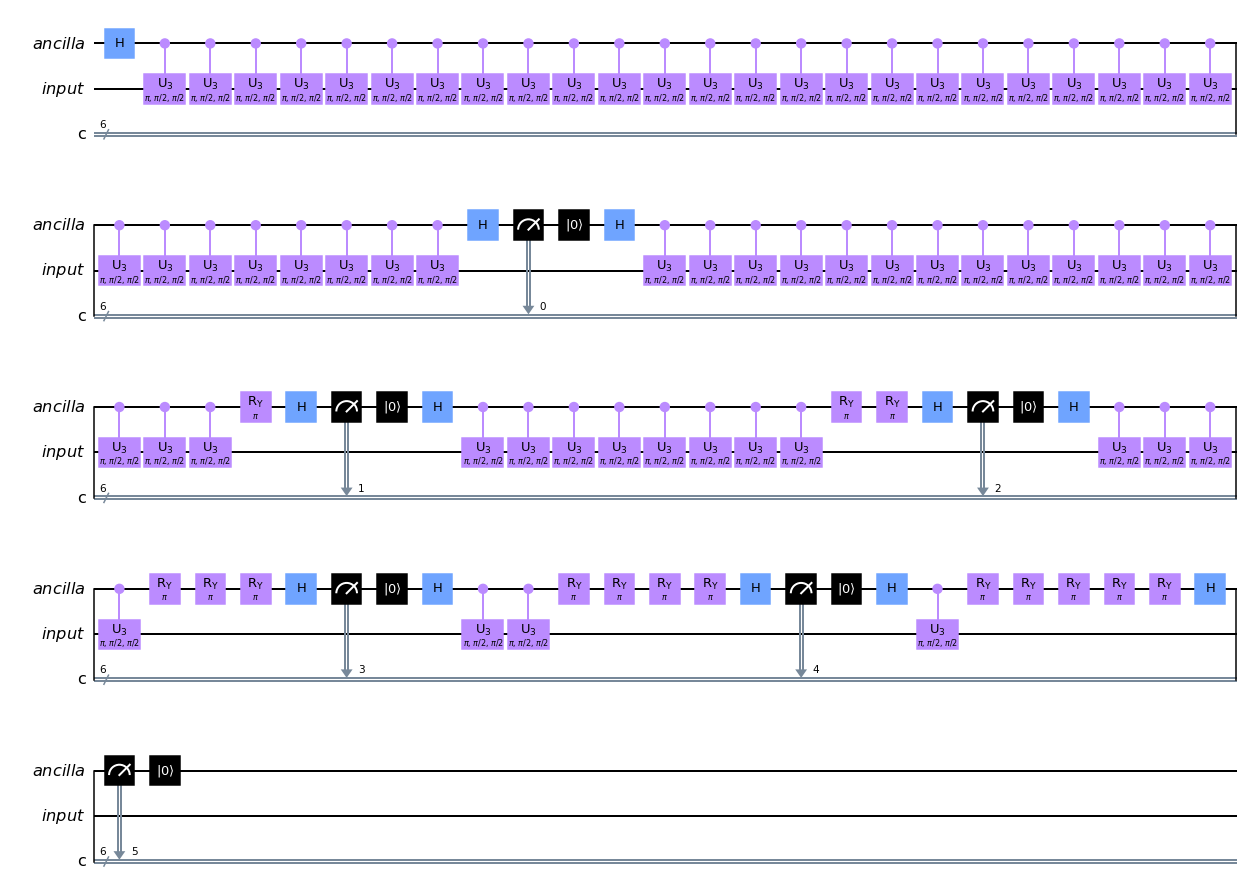

In [61]:
qc.draw('mpl')

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')             ## Why does statevector and qsam gives different counts+
job_sim = backend.run(transpile(qc, backend), shots = 1024)  # despite 1024 shots, statevector gives only 1 count
result_sim = job_sim.result()                                # https://qiskit.org/documentation/stable/0.24/tutorials/simulators/1_aer_provider.html

In [45]:
counts = result_sim.get_counts(qc)
print("\nTotal",counts)      


Total {'010101': 523, '101010': 501}


In [ ]:
Algorithm 1: Optimize the selection of γ using n-bit
estimations of eigenvalues
Guess an overapproximation α of λmax
γ := 1/α // Initialize scaling parameter
x := 0
// At each step, γ ∗ λmax ≤ 1
while x 6= 2n − 1 do
p := n-bit output distribution of QCL-QPE using
unitary e
iA2πγ and input state |bi
x := max{j ∈ {0, ..., 2
n − 1}| pj > 0, pj ∈ p}
// x is an n-bit estimation of
// 2
n ∗ γ ∗ λmax
if x = 0 then
γ := γ ∗ 2
n
else
γ := γ ∗ (2n−1)/x
end
end
Result: γ = λ˜−1
max, with λ˜
max n-bit estimation of λmax

In [ ]:
Algorithm 2: Verify if α is a n-bit overestimation of
λmax
Assumption: at each step, there is at least one eigenvalue of γA not
in S
j∈Z

j − 2−(n+1), j + 2−(n+1)
// Initialize scaling parameter
Γ := 1/2
n+1α
p := n-bit output distribution of QCL-QPE using
unitary e
iA2πΓ and input state |bi
if p0 6= 1 then
Return α is not valid
// Otherwise all eigenvalues
// estimations would have been 0
else
Return α is valid
end
Result: Return if α is an overestimation of λmax

In [ ]:
θi = 2 arcsin(C/λ˜i)